# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#read data
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [3]:
# split data into black and nonblack sounding names
dfblack = data[data.race=='b']
dfnonblack = data[data.race!='b']

# display some basic statistics
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Here, we only care about the columns of race and call back 
data = pd.concat([data.race,data.call], axis=1)
print('sample size =',len(data))
data.head()

sample size = 4870


,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


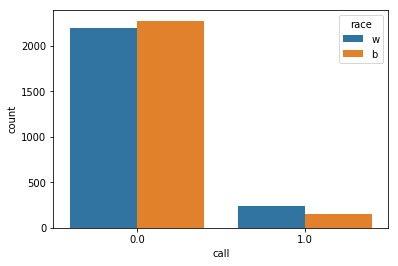

In [5]:
# A general view of number of callbacks for black & white-sounding names
import seaborn as sns

ax=sns.countplot(x=data.call, hue=data.race)
plt.show()

In [6]:
#Q1:What test is appropriate for this problem? Does CLT apply?
#Because it's a large data set with 4870 samples, the CLT (central limit theorem) applies
#Because, there are only two binary states for two types of data points, making for four categories in total. 
#Thus, an appropriate statistical test would be Pearson's X^2 test, which is a statsitcal test which applies to sets of categorical data.
#The CLT tells us that for large sample sizes the disbtibution will tend toward a multivariate normal distribution.
#Another method could be directly compare the rate of call back between the two groups, which is two-tailed z-test of the difference of two proportions.


In [7]:
#Q2.:What are the null and alternate hypotheses?
#The null hypotheses: The race a name sounds like should not have effect on the rate of callbacks
#The alternate hypotheses:The race of a  name sounds like gives affects the callback rate.

In [8]:
#Q3:Compute margin of error, confidence interval, and p-value.
# calculate statistics for binomial distributions
len_black = len(data[data['race'] == 'b']) # black sample size
len_white = len(data[data['race'] == 'w']) # white sample size
white_called = data[data['race'] == 'w']['call']
black_called = data[data['race'] == 'b']['call']
total_called = sum(data.call)
total_notcalled = len(data) - sum(data.call)

In [9]:
diff_of_means = np.abs(np.mean(white_called) - np.mean(black_called))
# assuming alpha = 0.05
SE = np.sqrt(np.std(white_called) ** 2 / len(white_called) + np.std(black_called) ** 2 / len(black_called))
margin_of_error = 1.96 * SE
confidence_interval = [diff_of_means - margin_of_error, diff_of_means + margin_of_error]

print('The margin of error is', margin_of_error)
print('The 95% confidence interval is', confidence_interval)

The margin of error is 0.0152552843854
The 95% confidence interval is [0.016777570469610682, 0.047288139240510473]


In [10]:
#calculate standard error. 
prob_called=total_called/len(data)
stderr = np.sqrt(prob_called*(1-prob_called)*(1/len_black+1/len_white))
print(stderr)
#get z score
prob_white_called = sum(data[data['race'] == 'w'].call)/len_white
prob_black_called = sum(data[data['race'] == 'b'].call)/len_black
print(prob_white_called)
print(prob_black_called)
z_score = (prob_white_called - prob_black_called) / stderr
print("z_score:",z_score)
p_value = stats.norm.sf(z_score)*2
print("p_value:",p_value)

0.00779689403617
0.0965092402464
0.064476386037
z_score: 4.10841215243
p_value: 3.98388683759e-05


In [11]:
#Q4. Write a story describing the statistical significance in the context or the original problem.

In [12]:
#We can see that the p-value is less than 0.05,which means highly significant. So, We can reject the Null hypothese. 
#Therefore, there is a statistically significant difference between callback rates for black and white-sounding names.

In [13]:
#Q5. Does your analysis mean that race/name is the most important factor in callback success? 
#Why or why not? If not, how would you amend your analysis?

In [14]:
#Above analysis does notmean that race/name is the most important factor in callback success. 
#What we can conclud it that race/name is one of the factors that affect callback
#There are also other feactures, such as education, years of experience and computer skills, that  may influence callback on resumes.
#Futher studies are needed to identify feactures that are significant predictors.